In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import random

In [6]:
tasks = pd.DataFrame(columns=['description', 'priority'])

try:
    tasks = pd.read_csv('tasks.csv')
except FileNotFoundError:
    pass

In [7]:
tasks

,description,priority
0,Buy groceries,Low
1,Complete project report,Medium
2,Schedule a meeting with the team,Low
3,Prepare presentation for the meeting,Medium
4,Pay the bills,High
5,Exercise,Low
6,laptop,High


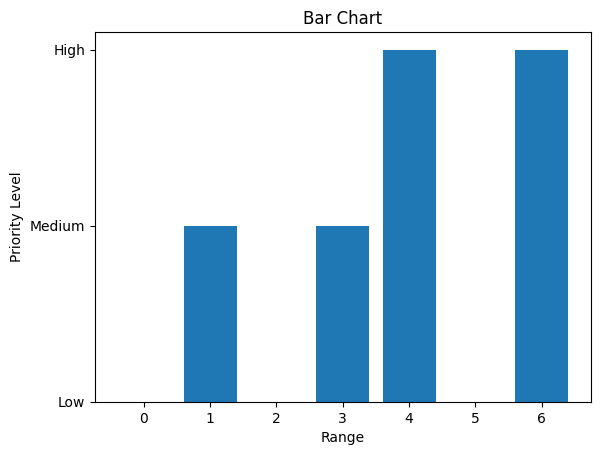

In [8]:
import matplotlib.pyplot as plt
import numpy as np
plt.bar(range(0, len(tasks)), tasks['priority'])
plt.title("Bar Chart")
plt.xlabel('Range')
plt.ylabel('Priority Level')
#plt.axis([max(range(0, len(tasks))), min(range(0, len(tasks))), max(tasks['priority']), min(tasks['priority'])])
#plt.ylim(max(tasks['priority']), min(tasks['priority']))
#plt.gca().invert_yaxis()
plt.show()

In [14]:
def save_tasks():
    tasks.to_csv('tasks.csv', index=False)

In [5]:
vectorizer = CountVectorizer()
clf = MultinomialNB()
model = make_pipeline(vectorizer, clf)
model.fit(tasks['description'], tasks['priority'])

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [6]:
def add_task(description, priority):
    global tasks  # Declare tasks as a global variable
    new_task = pd.DataFrame({'description': [description], 'priority': [priority]})
    tasks = pd.concat([tasks, new_task], ignore_index=True)
    save_tasks()


In [7]:
def remove_task(description):
    tasks = tasks[tasks['description'] != description]
    save_tasks()


In [8]:
def list_tasks():
    if tasks.empty:
        print("No tasks available.")
    else:
        print(tasks)


In [9]:
def recommend_task():
    if not tasks.empty:
        # Get high-priority tasks
        high_priority_tasks = tasks[tasks['priority'] == 'High']
        
        if not high_priority_tasks.empty:
            # Choose a random high-priority task
            random_task = random.choice(high_priority_tasks['description'])
            print(f"Recommended task: {random_task} - Priority: High")
        else:
            print("No high-priority tasks available for recommendation.")
    else:
        print("No tasks available for recommendations.")



In [42]:

while True:
    print("\nTask Management App")
    print("1. Add Task")
    print("2. Remove Task")
    print("3. List Tasks")
    print("4. Recommend Task")
    print("5. Exit")

    choice = input("Select an option: ")

    if choice == "1":
        description = input("Enter task description: ")
        priority = input("Enter task priority (Low/Medium/High): ").capitalize()
        add_task(description, priority)
        print("Task added successfully.")

    elif choice == "2":
        description = input("Enter task description to remove: ")
        remove_task(description)
        print("Task removed successfully.")

    elif choice == "3":
        list_tasks()

    elif choice == "4":
        recommend_task()

    elif choice == "5":
        print("Goodbye!")
        break

    else:
        print("Invalid option. Please select a valid option.")



Task Management App
1. Add Task
2. Remove Task
3. List Tasks
4. Recommend Task
5. Exit


Select an option:  4


Recommended task: Buy groceries - Priority: High

Task Management App
1. Add Task
2. Remove Task
3. List Tasks
4. Recommend Task
5. Exit


Select an option:  5


Goodbye!
